# Проект: Исследование стартапов

**Васильев А.В.**

**22.07.2025**

## Цель и задачи проекта

Провести анализ рынка инвестиций в стартапы, выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании, сформулировать рекомендации для инвесторов на основе данных.

Выполнение проекта состоит из 4 шагов:

1. Знакомство с данными: загрузка и первичная предобработка
2. Предобработка данных, предварительное исследование
3. Исследовательский анализ объединённых таблиц
4. Итоговый вывод и рекомендации

## Описание данных

***Названия файлов:***

'тут_была_ссылка' - информация о покупках одними компаниями других компаний

'тут_была_ссылка'- информация о компаниях и раундах финансирования

'тут_была_ссылка' - информация о сотрудниках

'тут_была_ссылка' - информация об образовании сотрудников

'тут_была_ссылка' - информация о типе образования сотрудника



***Опциональные датасеты:***

'тут_была_ссылка' - информация о фондах

'тут_была_ссылка' - информация о раундах инвестирования



***Описание датасетов:***



**Таблица acquisition**

id — идентификатор покупки

acquiring_company_id — идентификатор покупающей компании

acquired_company_id — идентификатор покупаемой компании

term_code — варианты расчёта

price_amount — сумма сделки

acquired_at — дата сделки




**Таблица company_and_rounds**

company ID — идентификатор компании

name — название компании

category code — категория области деятельности компании

status — статус компании

founded at — дата инвестирования

closed at — дата закрытия компании

domain — официальный сайт компании

network username — ник компании в сети

country code — код страны компании

investment rounds — число инвестиционных раундов

funding rounds — число раундов финансирования

funding total — сумма финансирования

milestones — вехи финансирования

funding round id — идентификатор этапа финансирования

company id — идентификатор компании

funded at — дата финансирования

funding round type — тип финансирования

raised amount — сумма финансирования

pre money valuation — предварительная денежная оценка

participants — число участников

is first round — является ли раунд первым

is last round — является раунд последним



**Таблица education**

id — идентификатор записи об образовании

person_id — идентификатор работника

instituition — название учебного заведения

graduated_at — дата получения образования



**Таблица people**

id — идентификатор сотрудника

first_name — имя сотрудника

last_name — фамилия сотрудника

company_id — идентификатор компании

network_username — ник в социальных сетях



**Таблица degrees**

id — идентификатор записи

object_id — идентификатор сотрудника

degree_type — тип образования

subject — специальность



**Таблица fund**

id — идентификатор фонда

name — название фонда

category_code — категория области деятельности компании

founded_at — дата создания фонда

domain — сайт фонда

network_username — ник фонда в сети

country_code — код страны фонда

investment_rounds — число инвестиционных раундов

invested_companies — число профинансированных компаний

milestones — вехи финансирования



**Таблица investment**

id — идентификатор этапа инвестирования

funding_round_id — идентификатор раунда инвестирования

company_id — индентификатор компании

funding_round_type — тип финансирования

fund_id — идентификатор фонда



## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
acquisition_df = pd.read_csv('тут_была_ссылка')
company_rounds_df = pd.read_csv('тут_была_ссылка')
education_df = pd.read_csv('тут_была_ссылка')
people_df = pd.read_csv('тут_была_ссылка')
degrees_df = pd.read_csv('тут_была_ссылка')
fund_df = pd.read_csv('тут_была_ссылка')
investment_df = pd.read_csv('тут_была_ссылка')

По порядку анализируем файлы, выгрузим первые строки.Также после каждого файла добавим промежуточные выводы и предобработку данных.


In [3]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [5]:
acquisition_df['term_code'] = acquisition_df['term_code'].astype('category')
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors='coerce')

acquisition_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   category      
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(4)
memory usage: 376.9 KB


**Выводы по таблице acquisition_df:**



- В датафрейме 9407 строк и 6 столбцов.

- названия столбцов соответствуют стилю snake case.

- id, acquiring_company_id, acquired_company_id, price_amount представлены целыми числами.

- term_code и acquired_at имеют тип object и содержат пропуски. Так как варианты оплаты ограничены, конвертируем term_code в category, оптимизировав память.

- acquired_at - указывает на дату сделки. Приведем к типу datetime.


### Знакомимся с таблицей company_rounds_df:

In [6]:
company_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
company_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [8]:
columns_to_int = ['company  ID', 'investment  rounds', 'funding  rounds', 'milestones', 'funding  round  id', 'company  id', 'participants', 'is  first  round', 'is  last  round']

for col in columns_to_int:
    company_rounds_df[col] = company_rounds_df[col].astype('Int64')
    company_rounds_df[col] = pd.to_numeric(company_rounds_df[col], errors='coerce', downcast='integer')

company_rounds_df.columns = [el.replace('  ', '_') for el in company_rounds_df.columns]

company_rounds_df = company_rounds_df.rename(columns={'company_id': 'fund_company_id','company_ID':'company_id'})

columns_to_datetime = ['funded_at', 'closed_at', 'founded_at']

for col in columns_to_datetime:
    company_rounds_df[col] = pd.to_datetime(company_rounds_df[col], errors='coerce')

columns_to_category = ['category_code', 'status', 'country_code', 'funding_round_type']

for col in columns_to_category:
    company_rounds_df[col] = company_rounds_df[col].astype('category')
    

company_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  category      
 3   status               217472 non-null  category      
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  category      
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  Int64         
 13  funding_round_

Выводы по таблице company_rounds_df:

- В датафрейме 217774 строк и 22 столбца.
- все столбцы приведем к единому стилю - snake case.
- company ID, investment rounds, funding rounds, milestones, funding round id, participants, is first round, is last round следует проебразовать в целочисленный тип и оптимизировать разрядность.
- category code, status, country code, funding round type содержат данные с ограниченным набором значений (категориальные данные). Для удобства анализа приведем их к типу category.
- founded at, closed at, funded at преобразуем в datetime для удобства.
- по информации таблицы есть понимание, что она будто состоит из 2-х частей: 21472 и 52928 непустых строк. Обе части содержат столбец идентификатор компании (но имеют разные названия - company ID и company id), следовательно эти 2 части каким-либо образом связаны.
- Предполагаю, что первая часть описывает компании, а вторая часть содержит информацию о событиях (раундах финансирования).


### Знакомимся с таблицей education_df:

In [9]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [10]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [11]:
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')

education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


Выводы по таблице education_df:

- в датафрейме 109610 строк и 4 столбца.
- названия столбцов соответствуют стилю snake case.
- id, person_id представлены целыми числами, instituition имеет тип object и содержит немного пропусков.
- graduated_at - указывает на дату получения образования. Половина данных в этом столбце отсутствует. Приведем к типу datetime.

### Знакомимся с таблицей people_df:

In [12]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [13]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [14]:
people_df['company_id'] = people_df['company_id'].astype('Int64')

people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int64 
 1   first_name        226704 non-null  object
 2   last_name         226708 non-null  object
 3   company_id        34615 non-null   Int64 
 4   network_username  38867 non-null   object
dtypes: Int64(1), int64(1), object(3)
memory usage: 8.9+ MB


Выводы по таблице people_df:

- в датафрейме 226709 строк и 5 столбцов.
- названия столбцов соответствуют стилю snake case.
- company_id и network_username содержат много пропусков. Преобразуем столбец company_id в тип int.

### Знакомимся с таблицей degrees_df:

In [15]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [16]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Выводы по таблице degrees_df:

- в датафрейме 109610 строк и 4 столбца.
- названия столбцов соответствуют стилю snake case. Типы данных подходящие.
- degree_type и subject содержат пропуски.

### 1.2. Анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [17]:
print ('Пропуски в датафрейме acquisition_df:')
display(acquisition_df.isna().sum())
display(acquisition_df.isna().sum() / len(acquisition_df))

Пропуски в датафрейме acquisition_df:


id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

In [18]:
print ('Пропуски в датафрейме company_rounds_df:')
display(company_rounds_df.isna().sum())
display(company_rounds_df.isna().sum() / len(company_rounds_df))

Пропуски в датафрейме company_rounds_df:


company_id                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
fund_company_id        164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

company_id             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
fund_company_id        0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
dtype: float64

In [19]:
print ('Пропуски в датафрейме education_df:')
display(education_df.isna().sum())
display(education_df.isna().sum() / len(education_df))

Пропуски в датафрейме education_df:


id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

In [20]:
print ('Пропуски в датафрейме people_df:')
display(people_df.isna().sum())
display(people_df.isna().sum() / len(people_df))

Пропуски в датафрейме people_df:


id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64

In [21]:
print ('Пропуски в датафрейме degrees_df:')
display(degrees_df.isna().sum())
display(degrees_df.isna().sum() / len(degrees_df))

Пропуски в датафрейме degrees_df:


id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

- acquisition_df: пропуски содержатся в двух столбцах - term_code и aquired_id. Значительная часть которых содежится в стобце term_code (80%) - формы расчета.

- company_rounds_df: пропуски содержатся во всех столбцах, значительная часть данных отсутствует.

- education_df: пропуски содержатся в двух столбцах - instituition и graduated_at, из них в столбце graduated_at - 47% пропусков.

- people_df: пропуски содержатся в 4 столбцах, значительная часть которых содежится в стобцах в company_id и network_username (из-за возможного отсуствия сотрудника в соц сетях) - более 80% в обоих.

- degrees_df: пропуски содержатся в двух столбцах - degree_type(10%) subject(26%) - что тоже является существенной проблемой для дальнейшего исследдования проекта.

Исходя из анализа пропусков во всех датасетах, следует сделать вывод о том, что во всех датасетах присутствуют столбцы с существенным количеством пропусков, которые нельзя удалить или заменить.

In [22]:
display("Полные дубликаты:")
display("acquisition:", acquisition_df.duplicated().sum())
display("company_and_rounds:", company_rounds_df.duplicated().sum())
display("education:", education_df.duplicated().sum())
display("people:", people_df.duplicated().sum())
display("degrees:", degrees_df.duplicated().sum())

'Полные дубликаты:'

'acquisition:'

0

'company_and_rounds:'

0

'education:'

0

'people:'

0

'degrees:'

0

### Промежуточные выводы

- Была выполнена стандартизация столбцов в формат snake_case, что улучшило читаемость данных.

- Для всех датасетов столбцы с датами привели к формату datetime, а id данные — к целочисленному формату

- Датафреймы содержат пропуски, причины многих неизвестны. Также есть "особенный" датасет (company_rounds_df), предпогалаю, что в дальнейшем его удобно будет разделить на 2 части для удобства анализа.

- Присутствуют пропуски в большом количестве.В дальнейшем примем решения что с ними делать(удалить или заменить)


## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [23]:
company_rounds_df['funded_year'] = company_rounds_df['funded_at'].dt.year


pivot_table_company_rounds = company_rounds_df.pivot_table(
    index='funded_year',
    values=['funding_round_id', 'raised_amount'],
    aggfunc={
        'funding_round_id': 'count',
        'raised_amount': 'median'}).reset_index()


pivot_table_company_rounds.columns = ['Год', 'Общее количество раундов', 'Типичный размер средств']


rounds_table_by_year = pivot_table_company_rounds[pivot_table_company_rounds['Общее количество раундов'] > 50]


display(rounds_table_by_year)

,Год,Общее количество раундов,Типичный размер средств
15,1999.0,76,2000000.0
16,2000.0,125,4200000.0
17,2001.0,96,3000000.0
18,2002.0,116,4200000.0
19,2003.0,159,3000000.0
20,2004.0,291,5000000.0
21,2005.0,1633,5500000.0
22,2006.0,2436,5000000.0
23,2007.0,3279,3973320.0
24,2008.0,3774,3110000.0


Визуализируем получившийся результат:

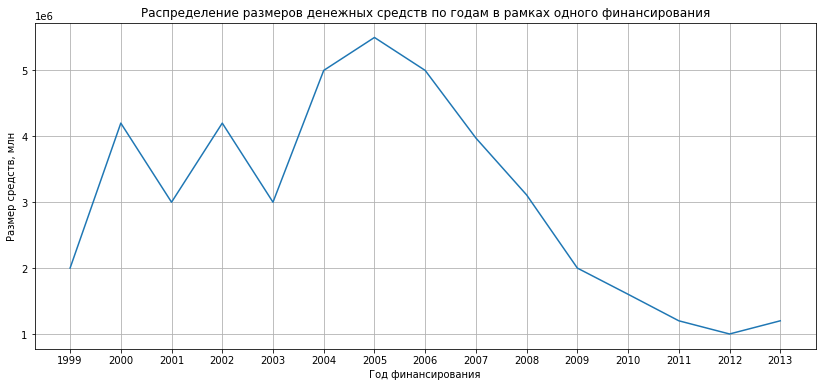

In [24]:
rounds_table_by_year.plot(kind = 'line',
                          x = 'Год',
                          y = 'Типичный размер средств',
                          title = 'Распределение размеров денежных средств по годам в рамках одного финансирования',
                          xlabel = 'Год финансирования',
                          ylabel = 'Размер средств, млн',
                          figsize = (14,6),
                          legend = False)

plt.xticks(range(1999, 2014, 1))

plt.grid()


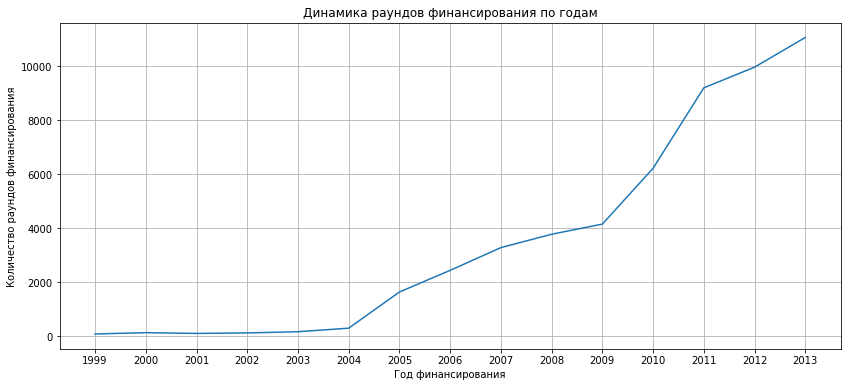

In [25]:
rounds_table_by_year.plot(kind = 'line',
                          x = 'Год',
                          y = 'Общее количество раундов',
                          title = 'Динамика раундов финансирования по годам',
                          xlabel = 'Год финансирования',
                          ylabel = 'Количество раундов финансирования',
                          figsize = (14,6),
                          legend = False)

plt.xticks(range(1999, 2014, 1))

plt.grid()

Для определения типичного размера финансирования использовалась медиана.

В 2005 году зафиксирован наивысший типичный размер привлечённых средств — 5,5 миллионов. Однако к 2013 году этот показатель снизился до  1 200 000, что может свидетельствовать об изменении стратегии инвесторов.

После пика финансирования в 2005 году количество раундов увеличивается, при этом медианный размер финансирования уменьшается. В 2013 году зафиксировано рекордное число раундов — 11 072, что указывает на высокую активность на инвестиционном рынке и расширение возможностей для стартапов получать финансирование, хотя его средний размер стал меньше.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Объединим датасеты people и education по столбцам: id=person_id.

In [26]:
total_education_PE = people_df.merge(education_df, left_on='id', right_on='person_id', suffixes=('', '_edu'))
total_education_PE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109056 entries, 0 to 109055
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                109056 non-null  int64         
 1   first_name        109056 non-null  object        
 2   last_name         109056 non-null  object        
 3   company_id        28638 non-null   Int64         
 4   network_username  33575 non-null   object        
 5   id_edu            109056 non-null  int64         
 6   person_id         109056 non-null  int64         
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), int64(3), object(4)
memory usage: 8.4+ MB


Создадим общий датасет с сотрудниками и образованием, добавив и датафрейм degrees. Однако нужно преобразовать столбец object_id к нужному типу. Для удобства работы с общий датафреймом переименуем и удалим дублирующиеся столбцы.

In [27]:
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:', '')
degrees_df['object_id'] = pd.to_numeric(degrees_df['object_id'], downcast='float', errors='coerce')
degrees_df.head()

,id,object_id,degree_type,subject
0,1,6117.0,MBA,NaN
1,2,6136.0,BA,"English, French"
2,3,6136.0,MS,Mass Communication
3,4,6005.0,MS,Internet Technology
4,5,5832.0,BCS,"Computer Science, Psychology"


In [28]:
total_education_PE = people_df.merge(
    education_df, 
    left_on='id', 
    right_on='person_id',
    how='left',
    suffixes=('_people', '_education'))


total_education_all = total_education_PE.merge(
    degrees_df, 
    left_on='person_id', 
    right_on='object_id',
    how='left')


total_education_all = total_education_all.rename(columns={
    'id': 'degree_id',
    'id_people': 'id_people',
    'person_id': 'person_id'})


display_columns = [
    'id_people', 'first_name', 'last_name', 'company_id', 'network_username',
    'id_education', 'person_id', 'instituition', 'graduated_at']


total_education_all[display_columns].head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaT


In [29]:
total_education_all.drop(columns=['id_education','person_id','object_id'])
total_education_all.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,degree_id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5,NaN,2415.0,10.0,Harvard University,NaT,2415.0,10.0,NaN,Computer Science
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [30]:
total_education_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370836 entries, 0 to 370835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         370836 non-null  int64         
 1   first_name        370831 non-null  object        
 2   last_name         370835 non-null  object        
 3   company_id        70869 non-null   Int64         
 4   network_username  81529 non-null   object        
 5   id_education      212198 non-null  float64       
 6   person_id         212198 non-null  float64       
 7   instituition      212109 non-null  object        
 8   graduated_at      113991 non-null  datetime64[ns]
 9   degree_id         212198 non-null  float64       
 10  object_id         212198 non-null  float32       
 11  degree_type       190722 non-null  object        
 12  subject           156477 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float32(1), float64(3), int

Проверим на дубликаты и удалим их, если они будут найдены.

In [31]:
duplicates = total_education_all.duplicated(
    subset=['id_people', 'first_name', 'last_name', 'company_id'],
    keep=False)


display(f"Найдено дубликатов: {duplicates.sum()}")

'Найдено дубликатов: 176355'

In [32]:
total_education_clean = total_education_all.drop_duplicates(
    subset=['id_people', 'first_name', 'last_name', 'company_id'],
    keep='first')

Добавим столбец is_educated - показатель, что у сотрудника отмечена дата окончания обучения или
заполнен тип образования.

In [33]:
total_education_clean['is_educated'] = 0

total_education_clean.loc[(total_education_clean['graduated_at'].notna()) | (total_education_clean['degree_type'].notna()),'is_educated'] = 1

total_education_clean[[
    'id_people', 
    'first_name', 
    'last_name', 
    'company_id', 
    'graduated_at',
    'degree_type', 
    'is_educated']].head()

/tmp/ipykernel_107/640518389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_education_clean['is_educated'] = 0
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id_people,first_name,last_name,company_id,graduated_at,degree_type,is_educated
0,10,Mark,Zuckerberg,5,NaT,NaN,0
1,100,Peter,Lester,27,NaT,NaN,0
2,1000,Dr. Steven,E. Saunders,292,NaT,NaN,0
3,10000,Neil,Capel,2526,NaT,NaN,0
4,100000,Sue,Pilsch,<NA>,NaT,NaN,0


In [34]:
group_df = total_education_clean.groupby('company_id')['is_educated'].agg(['count', 'sum']).sort_values('count', ascending=False)
display(group_df)


,count,sum
company_id,,
59,244,163
29,150,107
1242,138,98
231067,72,51
499,63,41
...,...,...
63585,1,0
7258,1,1
63581,1,0


Категории компаний по численности возьмем по законодательству:

- Микропредприятия: обычно до 15 сотрудников
- Малые предприятия: от 16 до 100 сотрудников
- Средние предприятия: от 101 до 250 сотрудников
- Крупные предприятия: свыше 250 сотрудников

Также добавим дополнительную категорию для компаний с 1 человеком, так как для начинающего стартапа, ИП, самозанятости такое имеет место быть, но для групп выше это может исказить общую картину, назовем ее - ИП/стартап. В нашем случае крупных предприятий нет, поэтому в функции их не учитываем.

Напишем функцию для распределения, добавив новый столбец в датафрейм. Также посчитаем процент образованных сотрудников в зависимости от численности сотрудников:

In [35]:
bins = [0, 1, 2, 3, 5, 10, 25, 100, float('inf')]
labels = [
    'ИП/стартап (1)', 
    'Микро (2)', 
    'Микро (3)', 
    'Микро (4-5)',
    'Малое (6-10)', 
    'Малое (11-25)', 
    'Малое (26-100)',
    'Среднее (100+)']

group_df['company_category'] = pd.cut(
    group_df['count'],
    bins=bins,
    labels=labels)

group_df['perc'] = round(group_df['sum'] / group_df['count'] * 100, 2)

display(group_df)

,count,sum,company_category,perc
company_id,,,,
59,244,163,Среднее (100+),66.80
29,150,107,Среднее (100+),71.33
1242,138,98,Среднее (100+),71.01
231067,72,51,Малое (26-100),70.83
499,63,41,Малое (26-100),65.08
...,...,...,...,...
63585,1,0,ИП/стартап (1),0.00
7258,1,1,ИП/стартап (1),100.00
63581,1,0,ИП/стартап (1),0.00


Сделаем сводную таблицу, посчитаем долю сотрудников с образованием, сгруппировав данные по категориям компаний.

In [36]:
company_category_df = group_df.pivot_table(values=['sum', 'count'],index='company_category',aggfunc='sum')

company_category_df['percentage'] = round(company_category_df['sum'] / company_category_df['count'] * 100, 2)
company_category_df = company_category_df.sort_values(by='percentage', ascending=False)

display(company_category_df)

,count,sum,percentage
company_category,,,
Среднее (100+),532,368,69.17
Малое (26-100),711,487,68.50
ИП/стартап (1),18117,9339,51.55
Малое (11-25),1425,734,51.51
Микро (2),5418,2749,50.74
Микро (3),2763,1337,48.39
Микро (4-5),2985,1401,46.93
Малое (6-10),2664,1189,44.63


Принял решение дополнить датасет degrees_df. Собранный датасет на основе 3-х таблиц дает более точное понимание об образованности сотрудников, добавляется дополнительный критерий для понимание определения "образованности сотрудника".


Категории компаний по численности определены по законодательству в РФ и для них создана сводная таблица.По ней видно, что больше всего образованных сотрудников в категории "Среднее предприятие" (численность от 101 до 250 сотрудников) - 69,17%, меньше всего у "Микропредприятий" (численность от 1 до 15 сотрудников, в нашем варианте) - 48,53%. Логичный результат - чем крупнее компания, тем больше там требований к образованию у сотрудников.


Однако подавляющее большинство по количеству сотрудников из данных в категориях "ИП/стартап" и "Микропредприятие". Следовательно - большинство может работать не по специальности, или не указывать вообще образование, так как требования к оформлению и проверке документов значительно меньше в этих категориях компаний.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [37]:
company_usernames = set(company_rounds_df['network_username'].dropna())
people_usernames = set(people_df['network_username'].dropna())

match = company_usernames & people_usernames


print(f"Общее количество уникальных значений в company_and_rounds: {len(company_usernames)}")
print(f"Общее количество уникальных значений в people: {len(people_usernames)}")
print(f"Количество совпадающих значений (company_and_rounds и people): {len(match)}")
print(f"Доля совпадающих значений (match и company_and_rounds): {len(match)/len(company_usernames)*100:.2f}%") 
print(f"Доля совпадающих значений (match и people): {len(match)/len(people_usernames)*100:.2f}%")

Общее количество уникальных значений в company_and_rounds: 79571
Общее количество уникальных значений в people: 38421
Количество совпадающих значений (company_and_rounds и people): 2199
Доля совпадающих значений (match и company_and_rounds): 2.76%
Доля совпадающих значений (match и people): 5.72%


Для предварительной проверки удалим пропуски, чтобы работать с данными без пропусков.

Доля общих значений невероятно низкая, с чего можно сделать вывод, что данные не связаны напрямую и объединение через этот столбец может нести ошибки. Объединение нецелесообразно


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Первичная предобработка показала, что датасет company_rounds_df состоит из двух логически связанных таблиц. Теперь разделим его таким образом: company_df c информацией о компаниях, а rounds_df c информацией о раундах, проведем обработку данных, проверим на дубликаты.

Переименуем столбец company_ID для удобства дальнейшей обработки.

In [38]:
company_df = company_rounds_df[[
    'company_id',
    'name',
    'category_code',
    'status',
    'founded_at',
    'closed_at',
    'domain',
    'network_username',
    'country_code',
    'investment_rounds',
    'funding_rounds',
    'funding_total',
    'milestones']]
company_df = company_df.drop_duplicates(subset = ['company_id'])
company_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  Int64         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  category      
 3   status             196553 non-null  category      
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   category      
 9   investment_rounds  196553 non-null  Int64         
 10  funding_rounds     196553 non-null  Int64         
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  Int64         
dtypes: Int64(4), category(3), datetime64[ns](2),

In [39]:
rounds_df = company_rounds_df[[
 'funding_round_id',
 'fund_company_id',
 'funded_at',
 'funding_round_type',
 'raised_amount',
 'pre_money_valuation',
 'participants',
 'is_first_round',
 'is_last_round']]

rounds_df = rounds_df.drop_duplicates(subset=['fund_company_id'])
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31940 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     31939 non-null  Int64         
 1   fund_company_id      31939 non-null  Int64         
 2   funded_at            31714 non-null  datetime64[ns]
 3   funding_round_type   31939 non-null  category      
 4   raised_amount        31939 non-null  float64       
 5   pre_money_valuation  31939 non-null  float64       
 6   participants         31939 non-null  Int64         
 7   is_first_round       31939 non-null  Int64         
 8   is_last_round        31939 non-null  Int64         
dtypes: Int64(5), category(1), datetime64[ns](1), float64(2)
memory usage: 2.4 MB


Разделили таблицу company_rounds_df на company_df и rounds_df, устранили дубликаты. В дальнейшем это упростит анализ.



## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [40]:
df_2_company = company_df[(company_df['funding_rounds'] > 0) | (company_df['investment_rounds'] > 0) | (company_df['status'] == 'acquired')].copy()
df_2_company.info()
df_2_company.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  Int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  category      
 3   status             40747 non-null  category      
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  category      
 9   investment_rounds  40747 non-null  Int64         
 10  funding_rounds     40747 non-null  Int64         
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  Int64         
dtypes: Int64(4), category(3), datetime64[ns](2), float64(1), obj

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.0,0
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0.0,4
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000.0,3
20,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0.0,4


В результате фильтрации получаем датаест из 40747 строк и 13 столбцов.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [41]:
df_2_company ['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

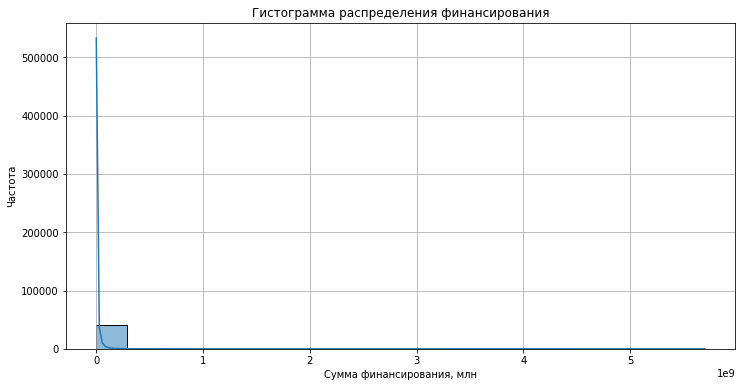

In [42]:
plt.figure(figsize = (12, 6))
sns.histplot(data = df_2_company,
             x = 'funding_total',
             bins = 20,
             kde = True)

plt.title('Гистограмма распределения финансирования')
plt.xlabel('Сумма финансирования, млн')
plt.ylabel('Частота')
plt.grid(True)

plt.show()

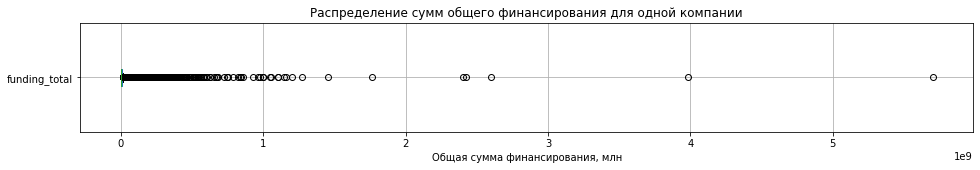

In [43]:
plt.figure(figsize = (16, 2))
df_2_company.boxplot(column = 'funding_total', vert = False)
plt.title('Распределение сумм общего финансирования для одной компании')
plt.xlabel('Общая сумма финансирования, млн')

plt.show()

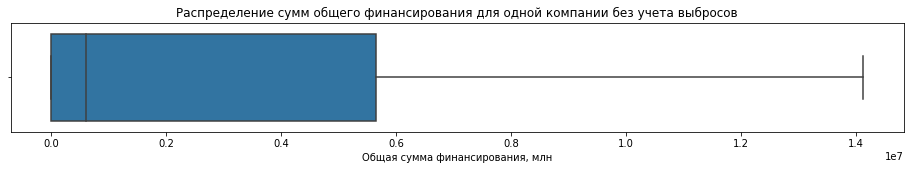

In [44]:
plt.figure(figsize = (16, 2))
sns.boxplot(data = df_2_company, x ='funding_total', showfliers = False)
plt.title('Распределение сумм общего финансирования для одной компании без учета выбросов')
plt.xlabel('Общая сумма финансирования, млн')

plt.show()

Сильная асимметрия: Среднее значение значительно больше медианы (10.14 млн против 0.6 млн), что указывает на асимметрию распределения, вызванную выбросами.

Много компаний с нулевым финансированием: ак минимум четверть записей имеют funding_total = 0 (25-й процентиль нулевой). Выбросы: очень высокое максимальное значение (5.7 млрд) существенно превышает 75-й перцентиль (5.65 млн).

Типичные суммы общего финансирования сконцентрированы до 0,6 млн.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

К подготовленному датасету присоединим столбцы из таблицы acquisition, чтобы начать анализ.

Затем отфильтруем данные по заданным параметрам. Проверим распределения по категориям, стране, вариантам покупки.

In [45]:
acq_2_company_df = pd.merge(
    df_2_company,
    acquisition_df[['acquired_company_id', 'price_amount','term_code']],
    left_on = 'company_id',
    right_on = 'acquired_company_id',
    how = 'left')


acq_2_company_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           40890 non-null  Int64         
 1   name                 40890 non-null  object        
 2   category_code        35436 non-null  category      
 3   status               40890 non-null  category      
 4   founded_at           27911 non-null  datetime64[ns]
 5   closed_at            2128 non-null   datetime64[ns]
 6   domain               35883 non-null  object        
 7   network_username     20938 non-null  object        
 8   country_code         34858 non-null  category      
 9   investment_rounds    40890 non-null  Int64         
 10  funding_rounds       40890 non-null  Int64         
 11  funding_total        40890 non-null  float64       
 12  milestones           40890 non-null  Int64         
 13  acquired_company_id  9390 non-n

In [46]:
acq_2_company_df_01 = acq_2_company_df[
    (acq_2_company_df['status'] == 'acquired') &
    (acq_2_company_df['funding_total'] > 0) &
    ((acq_2_company_df['price_amount'] == 0) |
    (acq_2_company_df['price_amount'] == 1))]

acq_2_company_df_01.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquired_company_id,price_amount,term_code
25,10054,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0,7,121500000.0,3,10054.0,0.0,cash_and_stock
63,101312,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0,3,4000000.0,2,101312.0,0.0,NaN
66,101340,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0,1,250000.0,1,101340.0,0.0,NaN
67,10137,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0,3,1310000.0,2,10137.0,0.0,cash_and_stock
68,10139,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0,2,44925000.0,1,10139.0,0.0,NaN


In [47]:
print("\nРаспределение по категориям компаний (абсолютные значения):")
print(acq_2_company_df_01['category_code'].value_counts())
print("\nРаспределение по категориям компаний (относительные значения):")
print(acq_2_company_df_01['category_code'].value_counts(normalize = True))


Распределение по категориям компаний (абсолютные значения):
software            362
web                 216
enterprise          131
mobile              118
advertising          77
games_video          76
biotech              69
ecommerce            61
network_hosting      56
semiconductor        43
cleantech            40
hardware             36
analytics            32
security             30
public_relations     26
other                20
search               18
social               17
travel               16
messaging            16
health               13
medical              11
consulting           10
education            10
news                  9
music                 8
finance               7
fashion               5
photo_video           3
hospitality           3
design                3
manufacturing         3
legal                 2
automotive            2
sports                2
transportation        2
nanotech              0
pets                  0
government            0
loc

In [48]:
print("\nРаспределение по странам (абсолютные значения):")
print(acq_2_company_df_01['country_code'].value_counts())
print("\nРаспределение по странам (относительные значения):")
print(acq_2_company_df_01['country_code'].value_counts(normalize = True))


Распределение по странам (абсолютные значения):
USA    1236
GBR      64
CAN      46
DEU      31
ISR      27
       ... 
HTI       0
IDN       0
IOT       0
IRN       0
ZWE       0
Name: country_code, Length: 175, dtype: int64

Распределение по странам (относительные значения):
USA    0.804688
GBR    0.041667
CAN    0.029948
DEU    0.020182
ISR    0.017578
         ...   
HTI    0.000000
IDN    0.000000
IOT    0.000000
IRN    0.000000
ZWE    0.000000
Name: country_code, Length: 175, dtype: float64


In [49]:
print("\nРаспределение по способу покупки (абсолютные значения):")
print(acq_2_company_df_01['term_code'].value_counts())
print("\nРаспределение по способу покупки (относительные значения):")
print(acq_2_company_df_01['term_code'].value_counts(normalize = True))


Распределение по способу покупки (абсолютные значения):
cash              68
cash_and_stock    35
stock             18
Name: term_code, dtype: int64

Распределение по способу покупки (относительные значения):
cash              0.561983
cash_and_stock    0.289256
stock             0.148760
Name: term_code, dtype: float64


In [50]:
analysis_result = acq_2_company_df_01.groupby('price_amount').agg({'company_id': 'count','funding_total': ['median', 'mean']}).reset_index()
display(analysis_result)

price_amount company_id funding_total              
                    count        median          mean
0          0.0       1618     6000000.0  1.815296e+07

Более 80% проданных компаний находятся в США, затем Великобритания (4.2%) и Канада (почти 3%).

Самые распространенные категории, которую продают за символические деньги - software (23,3%), web (14%), enterprise (8,4%), mobile (7,6%). Все относятся к сфере IT. Это говорит о большом количестве стартапов в этой сфере, что распространено в США, например в Силиконовой долине.

Больше 56% случаев покупки - за наличные.

Всего продано 1618 компаний с медианной суммой финансирования 6 млн.

Теперь определим показатели выбросов, для этого используем квартили.

In [51]:
Q1 = acq_2_company_df_01['funding_total'].quantile(0.25)
Q3 = acq_2_company_df_01['funding_total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(Q1 - 1.5 * IQR, 0)  
upper_bound = Q3 + 1.5 * IQR

emissions = acq_2_company_df_01[(acq_2_company_df_01['funding_total'] < lower_bound) | (acq_2_company_df_01['funding_total'] > upper_bound)]

lower_percentile = (acq_2_company_df_01['funding_total'] <= lower_bound).mean() * 100
upper_percentile = (acq_2_company_df_01['funding_total'] <= upper_bound).mean() * 100

print("Данные описательной статистики:")
print(f"Нижний квартиль (25%): {Q1:,.2f}$")
print(f"Верхний квартиль (75%): {Q3:,.2f}$")
print(f"Межквартильный размах (IQR): {IQR:,.2f}$")
print(f"\nГраницы выбросов по методу Тьюки (1.5*IQR):")
print(f"Нижний порог: {lower_bound:,.2f}$ (все значения ниже считаются выбросами)")
print(f"Верхний порог: {upper_bound:,.2f}$ (все значения выше считаются выбросами)")
print(f"\nТипичный диапазон финансирования: от {Q1:,.2f}$ до {Q3:,.2f}$")
print(f"Обнаружено выбросов: {len(emissions)} ({len(emissions)/len(acq_2_company_df_01)*100:.1f}% от выборки)")
print(f"\nРаспределение данных относительно границ:")
print(f"Нижняя граница соответствует {lower_percentile:.2f}% данных")
print(f"Верхняя граница соответствует {upper_percentile:.2f}% данных")

Данные описательной статистики:
Нижний квартиль (25%): 2,000,000.00$
Верхний квартиль (75%): 15,500,000.00$
Межквартильный размах (IQR): 13,500,000.00$

Границы выбросов по методу Тьюки (1.5*IQR):
Нижний порог: 0.00$ (все значения ниже считаются выбросами)
Верхний порог: 35,750,000.00$ (все значения выше считаются выбросами)

Типичный диапазон финансирования: от 2,000,000.00$ до 15,500,000.00$
Обнаружено выбросов: 147 (9.1% от выборки)

Распределение данных относительно границ:
Нижняя граница соответствует 0.00% данных
Верхняя граница соответствует 90.91% данных


Верхняя граница столбца funding_total - 35,75 млн, выше этой границы находится около 9% значений, соответсвенно 91% находится ниже этих значений.

Нижняя граница столбца funding_total - 0, так как отрицательная сумма не может существовать, процент данных ниже нижней границы 0.0%.

Для четверти компаний общая сумма финансирования составила менее 2 млн. 75% компаний получили финансирование менее 15,5 млн.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

Для начала почистим датасет - уберем пропуски. Затем сгруппируем данные и визуализируем. За типичную цену примем медиану, разброс - среднеквадратичное отклонение.

Text(122.09375, 0.5, 'Категории компаний')

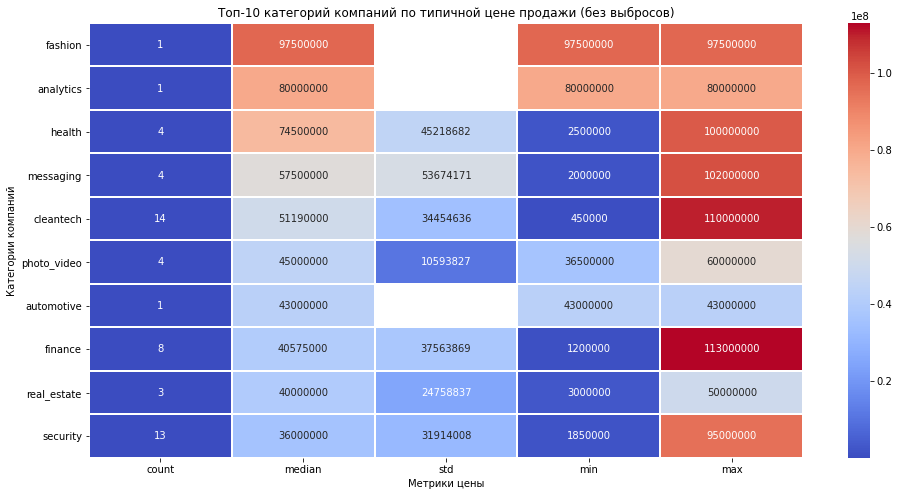

In [52]:
company_category_df = acq_2_company_df.loc[
    (acq_2_company_df['category_code'].notna()) & 
    (acq_2_company_df['price_amount'].notna()) &
    (acq_2_company_df['price_amount'] > 0) &  
    (acq_2_company_df['price_amount'] <= acq_2_company_df['price_amount'].quantile(0.9))].copy()

group_company_category = company_category_df.groupby('category_code')['price_amount'].agg([
    'count',       
    'median',        
    'std',
    'min',
    'max',])

top_10_median = group_company_category.sort_values('median', ascending = False).head(10)

plt.figure(figsize = (16, 8))
sns.heatmap(data=top_10_median, annot=True,fmt='.0f',linewidths=1,cmap='coolwarm')

plt.title('Топ-10 категорий компаний по типичной цене продажи (без выбросов)')
plt.xlabel('Метрики цены')
plt.ylabel('Категории компаний')

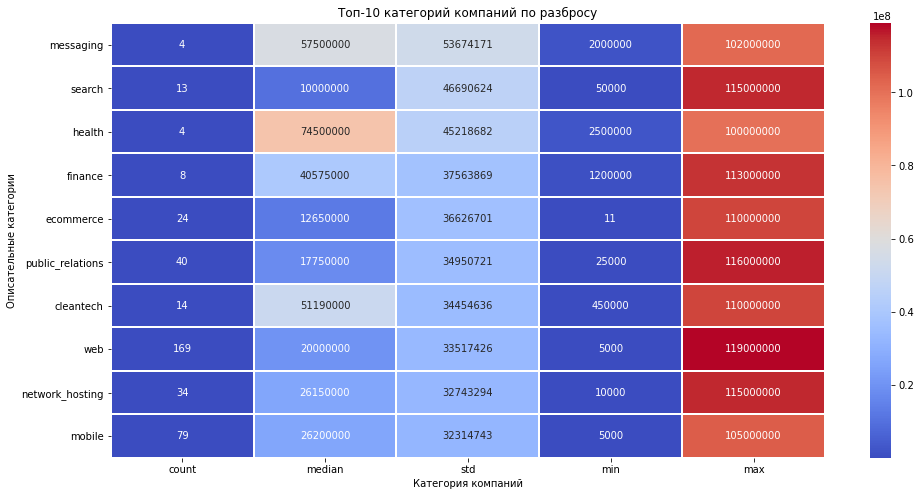

In [53]:
top_10_std = group_company_category.sort_values('std', ascending = False).head(10)
plt.figure(figsize = (16, 8))
sns.heatmap(data = top_10_std, annot = True, fmt = '.0f', linewidths = 1, cmap = 'coolwarm')

plt.title('Топ-10 категорий компаний по разбросу')
plt.xlabel('Категория компаний')
plt.ylabel('Описательные категории')
plt.show()

Выбрали топ-10 категорий стартапов с наибольшей типичной ценой продажи и с наибольшим разбросом цен.

Для подсчета типичной цены использовали медиану значений, так как разбросы по суммам достаточно большие, что сильно влияет на среднее значение.

Для расчета разброса выбрали показатель стандартного отклонения, чем он больше, тем больше разброс цен. Также вывели такие показатели как, количество проданных стартапов, минимальная и максимальная сумма.

Топ-10 оптимально, что позволит подобрать наиболее подходящие категории для высокорисковых инвестиций.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [54]:
rounds = df_2_company[df_2_company['funding_rounds'] >0]

df_status = rounds.groupby('status').agg({'funding_rounds':'mean'}).reset_index()

print(f"Таблица типичного количества раундов по статусу:")
df_status

Таблица типичного количества раундов по статусу:


,status,funding_rounds
0,acquired,1.896645
1,closed,1.383437
2,ipo,2.526531
3,operating,1.642359


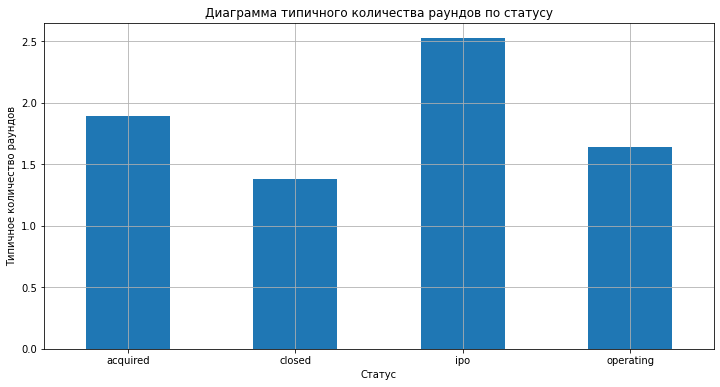

In [55]:
df_status.plot(kind = 'bar',
               x = 'status',
               y = 'funding_rounds',
               rot = 0,
               legend = False,
               figsize = (12, 6))

plt.title('Диаграмма типичного количества раундов по статусу')
plt.xlabel('Статус')
plt.ylabel('Типичное количество раундов')
plt.grid()
plt.show()

У компаний, выходящих на ipo наибольшее количество раундов финансирования - в среднем 2,5. У приобретенных - почти 2.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

**Предобработка данных.**

На основе проведенной работы с датасетами была выполнена стандартизация столбцов в формат
snake_case, что улучшило читаемость данных, столбцы с датами привели к формату datetime, а id
данные — к целочисленному формату, что улучшило их анализ. Датафреймы содержат пропуски,
причины многих неизвестны и непонятны, все пропуски оставлены и обрабатывались индивидуально
в зависимости от аналитических задач. Также есть "особенный" датасет (company_rounds_df) -
разделен на 2 части для удобства анализа.


**Выводы по предварительному исследованию.**

Рынок инвестиций в стартапы характеризуется высокой активностью, особенно в IT-сфере (software, web, enterprise, mobile). США доминируют по количеству сделок (более 80%), за ними следуют Великобритания и Канада. Типичный размер финансирования снизился с 5,5 млн (2005) до 1,2 млн (2013), что может указывать на изменение стратегий инвесторов в сторону меньших, но более частых вложений.

Наиболее успешные категории стартапов (по медианной цене продажи и разбросу цен):

- Недвижимость (real estate)
- Автомобильный бизнес (automotive)
- Биотехнологии (biotech)
Компании с IPO имеют больше раундов финансирования (в среднем 2,5), чем приобретенные (около 2). Большинство сделок (56%) совершаются за наличные. Образование сотрудников коррелирует с размером компании: в средних предприятиях (101–250 сотрудников) доля образованных сотрудников выше (69,17%), чем в микропредприятиях (48,53%).

**Рекомендации для инвесторов по выбору стартапов и компаний**

**1. Приоритетные направления для инвестиций**

Для стабильных инвестиций с умеренным риском стоит рассматривать IT-сектор, включая разработку программного обеспечения, веб-технологии, корпоративные решения и мобильные приложения. Эти направления отличаются высокой ликвидностью и большим количеством сделок, что делает их относительно безопасным выбором.

Для инвесторов, готовых к более высокому риску ради потенциально большей прибыли, интерес могут представлять биотехнологии, сектор недвижимости и автомобильный бизнес. Однако следует учитывать, что эти сферы требуют более глубокой экспертизы и более длительного горизонта инвестирования.

Особую осторожность следует проявлять в отношении стартапов с нулевым историческим финансированием. Статистика показывает, что около четверти таких компаний оказываются нерентабельными.

**2. Географическое распределение инвестиций**

Основным и наиболее ликвидным рынком остаются США, где сосредоточено наибольшее количество сделок. Альтернативными, но менее активными рынками являются Великобритания и Канада. При выходе на эти рынки важно учитывать местные особенности регулирования и налогообложения.

**3. Финансовые параметры инвестиций**

Оптимальный диапазон инвестиций составляет от 2 до 15,5 миллионов долларов. Вложения свыше 35,75 миллионов долларов относятся к высокорисковым - такие сделки составляют около 9% от общего объема и требуют особенно тщательной проверки.

**4. Критерии оценки перспективности компаний**

Устойчивыми показателями обладают компании, прошедшие 2 и более раунда финансирования. Особенно это характерно для организаций, вышедших на IPO. Средние предприятия с численностью сотрудников от 101 до 250 человек часто демонстрируют более высокий процент квалифицированных кадров, что может свидетельствовать об их стабильности.

Микропредприятия и индивидуальные предприниматели представляют повышенный инвестиционный риск, что связано с меньшей прозрачностью их деятельности и финансовых показателей.

**5. Условия совершения сделок**

Наиболее распространенным форматом расчетов остаются наличные платежи, которые используются в 56% случаев. При заключении сделок рекомендуется уделять особое внимание механизмам расчетов и гарантиям выполнения обязательств.
